In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import censusgeocode as cg
import censusbatchgeocoder
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; 
warnings.filterwarnings('ignore')

In [2]:
#Read Crime Data
crimedata = pd.read_csv("C:\\Data Analytics\\Sem 3\\Dataset\\CrimeDataset.csv")

In [3]:
crime = crimedata.copy() #Make a copy of crime data
#filter crime data 2014-2019
newcrime = crime[(crime['Year']>2014) & (crime['Year']<2019)] 
newcrime.shape #1069147,31

(1069147, 31)

In [4]:
newcrime = newcrime.drop(columns=['Unnamed: 0']) #Remove the column Unnamed: 0
newcrime.columns
newcrime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
183061,11556487,JC104662,2018-12-31 23:59:00,112XX S SACRAMENTO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.696064,"(41.689078832, -87.696064026)",33.0,4447.0,73.0,256.0,42.0,33.0,9.0,254.0
183062,11561837,JC110056,2018-12-31 23:59:00,013XX W 72ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,-87.657709,"(41.763181359, -87.657709477)",17.0,22257.0,65.0,408.0,32.0,23.0,17.0,216.0
183063,11552699,JC100043,2018-12-31 23:57:00,084XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,-87.647391,"(41.740520866, -87.647390719)",18.0,21554.0,70.0,530.0,13.0,59.0,20.0,233.0
183064,11552724,JC100006,2018-12-31 23:56:00,018XX S ALLPORT ST,0440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,-87.657625,"(41.857068095, -87.657625201)",8.0,14920.0,33.0,365.0,26.0,43.0,15.0,150.0
183065,11552731,JC100031,2018-12-31 23:55:00,078XX S SANGAMON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,-87.647717,"(41.75191443, -87.647716532)",17.0,21554.0,70.0,487.0,31.0,59.0,20.0,229.0


In [5]:
#Data Cleaning of Crime Data
#Standardise Column Names
newcrime.columns = ['ID','Case_Number','Reported_Date', 'Block', 'IUCR','Primary_Type','Description','Location_Description','Arrest','Domestic','Beat','District','Ward','Community_Area','FBI_Code','X_Coordinate','Y_Coordinate','Year','Updated_On','Latitude','Longitude','Location','Historical_Wards_2003to2015','Zip_Codes','Community_Areas','Census_Tracts','Wards','Boundaries_ZIP_codes','Police_Districts','Police_Beats']
newcrime.columns
#Missing values check
newcrime.isna().sum() #has null values

ID                                 0
Case_Number                        0
Reported_Date                      0
Block                              0
IUCR                               0
Primary_Type                       0
Description                        0
Location_Description            3606
Arrest                             0
Domestic                           0
Beat                               0
District                           1
Ward                               7
Community_Area                     2
FBI_Code                           0
X_Coordinate                   15683
Y_Coordinate                   15683
Year                               0
Updated_On                         0
Latitude                       15683
Longitude                      15683
Location                       15683
Historical_Wards_2003to2015    19021
Zip_Codes                      15683
Community_Areas                18528
Census_Tracts                  18121
Wards                          18506
B

In [6]:
newcrime['Reported_Date'] = pd.to_datetime(newcrime['Reported_Date'])

In [7]:
newcrime['Month'] = newcrime['Reported_Date'].dt.month
newcrime['Day'] = newcrime['Reported_Date'].dt.day
newcrime['Weekday'] = newcrime['Reported_Date'].dt.dayofweek
newcrime['HourOfDay'] = newcrime['Reported_Date'].dt.hour

In [9]:
narcotics = newcrime[(newcrime.Primary_Type == 'NARCOTICS') | (newcrime.Primary_Type == 'LIQUOR LAW VIOLATION') | (newcrime.Primary_Type == 'OTHER NARCOTIC VIOLATION') | (newcrime.Primary_Type == 'PUBLIC PEACE VIOLATION') | (newcrime.Primary_Type == 'WEAPONS VIOLATION') | (newcrime.Primary_Type == 'PUBLIC INDECENCY') | (newcrime.Primary_Type == 'ASSAULT') | (newcrime.Primary_Type == 'HOMICIDE') | (newcrime.Primary_Type == 'GAMBLING')  ]

In [10]:
narcotics.Year.value_counts()

2015    47878
2018    41677
2016    38318
2017    38227
Name: Year, dtype: int64

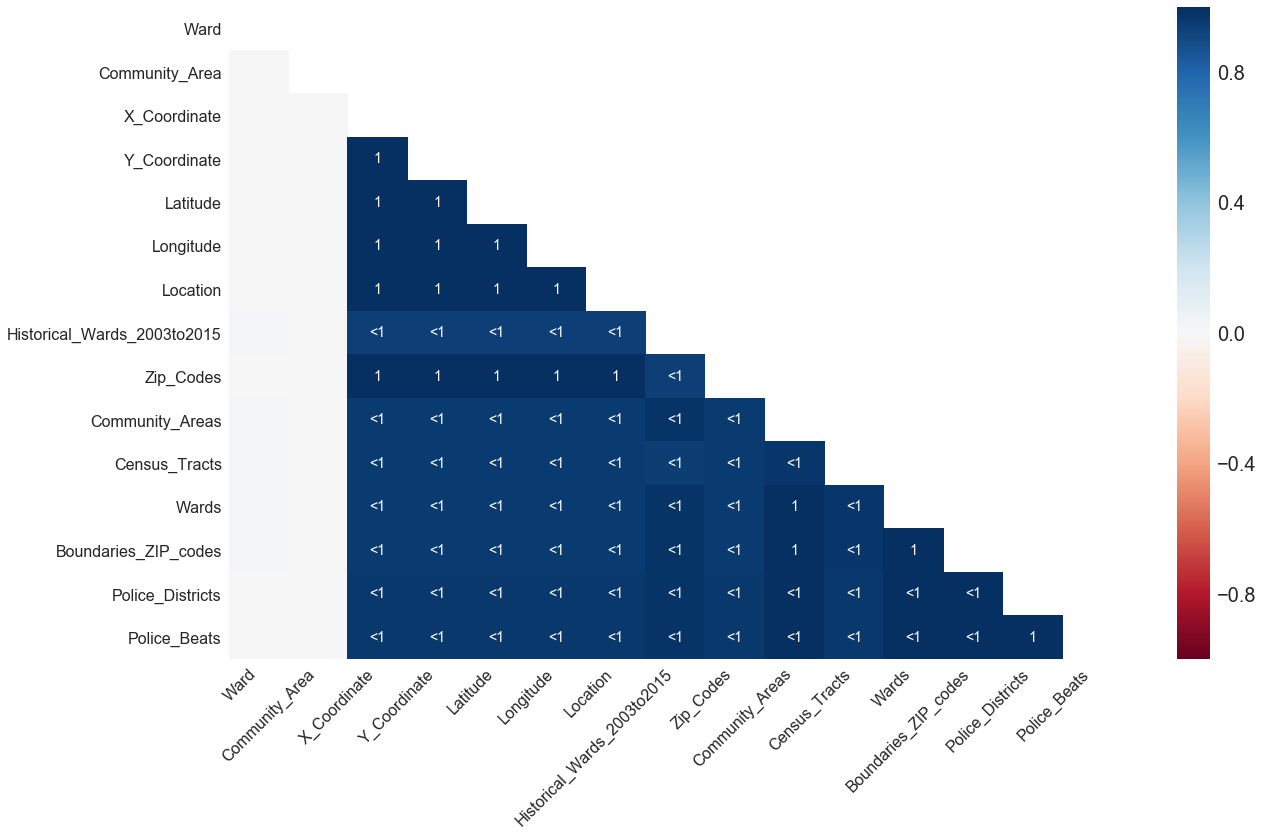

In [14]:
sns.set(font_scale=2)
msno.heatmap(narcotics)

In [15]:
#Statistics of arrest and non arrest ()
arrest_count = narcotics['Arrest'].value_counts().sort_index()
totalcrimes = narcotics['ID'].count()
print(arrest_count)
arrestdf = arrest_count.rename_axis('unique_values').reset_index(name='counts')
print (arrestdf)
nonarrestper = round((arrestdf.iloc[0,1]/totalcrimes.astype(int))*100,2)
arrestper = round((arrestdf.iloc[1,1].astype(int)/totalcrimes)*100,2)
print(arrestper)
print(nonarrestper)

False    69259
True     96841
Name: Arrest, dtype: int64
   unique_values  counts
0          False   69259
1           True   96841
58.3
41.7


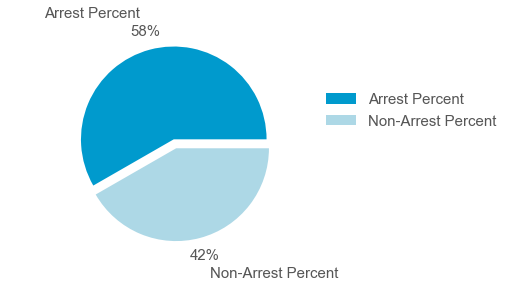

In [24]:
fig, ax = plt.subplots()
sns.set(font_scale=1.5)
color_palette_list = ['#009ACD','#ADD8E6','#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#565656'
plt.rcParams['axes.labelcolor']= '#565656'
plt.rcParams['xtick.color'] = '#565656'
plt.rcParams['ytick.color'] = '#565656'
plt.rcParams['font.size']=15

labels = ['Arrest Percent', 
         'Non-Arrest Percent']

percentages = [arrestper, nonarrestper]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [26]:
locdata = pd.read_csv('C:/Data Analytics/Sem 3/Dataset/LocationsZip.csv') #load the fetched latitude & longitude using censusgeocode

In [28]:
locdata['Block'] = locdata['PropertyAddress'].str.split(',').str[0]
locdata['ZipCode'] = locdata.ZipCode.astype(int)
locdata['ZipCode'] = locdata.ZipCode.astype(str)


In [29]:
#Lookup for zipcode
narcotics.Zip_Codes.replace('NaN', np.NaN, inplace=True)
narcotics.loc[narcotics['Zip_Codes'].isnull(),'Zip_Codes'] = narcotics['Block'].map(locdata.ZipCode)
#Lookup for latitude
narcotics.loc[narcotics['Latitude'].isna(),'Latitude'] = narcotics['Block'].map(locdata.LAT)
#Lookup for longitude
narcotics.loc[narcotics['Longitude'].isna(),'Longitude'] = narcotics['Block'].map(locdata.LON)

In [30]:
#Fill missing Zipcodes
s = locdata.set_index('Block')['ZipCode']
narcotics['Zip_Codes'] = narcotics['Zip_Codes'].fillna(narcotics['Block'].map(s))
#Fill missing latitude
s1 = locdata.set_index('Block')['LAT']
narcotics['Latitude'] = narcotics['Latitude'].fillna(narcotics['Block'].map(s1))
#Fill missing longitude
s2 = locdata.set_index('Block')['LON']
narcotics['Longitude'] = narcotics['Longitude'].fillna(narcotics['Block'].map(s2))
#Fill Location Description with Unknown
narcotics['Location_Description'] = narcotics['Location_Description'].fillna("Unknown")
#Fill Location
Locationcon = '(' + locdata['LAT'].astype(str) + ',' + ' ' + locdata['LON'].astype(str) + ')'
locdata['Location'] = Locationcon
s3 = locdata.set_index('Block')['Location']
narcotics['Location'] = narcotics['Location'].fillna(narcotics['Block'].map(s3))

In [31]:
narcotics.isna().sum()

ID                                0
Case_Number                       0
Reported_Date                     0
Block                             0
IUCR                              0
Primary_Type                      0
Description                       0
Location_Description              0
Arrest                            0
Domestic                          0
Beat                              0
District                          0
Ward                              2
Community_Area                    1
FBI_Code                          0
X_Coordinate                   3389
Y_Coordinate                   3389
Year                              0
Updated_On                        0
Latitude                          0
Longitude                         0
Location                          0
Historical_Wards_2003to2015    3784
Zip_Codes                         0
Community_Areas                3685
Census_Tracts                  3673
Wards                          3683
Boundaries_ZIP_codes        

In [32]:
#Drop columns derived from location attributes to eliminate noise and do not contribute to the predictor variable
#Since we have longitude and latitude, there is no requirement of x-coordinate and y co-ordinate
narcotics = narcotics.drop(columns=['X_Coordinate','Y_Coordinate','Historical_Wards_2003to2015','Census_Tracts','Wards','Boundaries_ZIP_codes','Police_Districts','Police_Beats','District','Ward','Community_Area','Community_Areas','Beat'])
narcotics.isna().sum()

ID                      0
Case_Number             0
Reported_Date           0
Block                   0
IUCR                    0
Primary_Type            0
Description             0
Location_Description    0
Arrest                  0
Domestic                0
FBI_Code                0
Year                    0
Updated_On              0
Latitude                0
Longitude               0
Location                0
Zip_Codes               0
Month                   0
Day                     0
Weekday                 0
HourOfDay               0
dtype: int64

In [35]:
narcotics.to_csv('C:\\Data Analytics\\Sem 3\\ICT Solution\\Data Sets\\CleanCrimes.csv',index=False)

In [36]:
narcotics.shape #166100

(166100, 21)

In [ ]:
#Extract only null rows for location & zip codes
locnull = narcotics[narcotics['Latitude'].isnull()]
locnull.shape
city = 'Chicago'
state = 'IL'
address = locnull['Block']
address = address.drop_duplicates()
addressdata = pd.DataFrame(address)
addressdata['city'] = city
addressdata['state'] = state
addressdata.columns = ['address','city','state']
addressdata = addressdata.reset_index()
addressdata['id'] = np.arange(1,len(addressdata)+1)
addressdata = addressdata.drop(columns=['index'])
#print (addressdata)
#Rearrange columns - addressdata
cols = list(addressdata.columns)
a, b = cols.index('address'), cols.index('id')
cols[b], cols[a] = cols[a], cols[b]
addressdata = addressdata[cols]
addressdata.head()
addressdata.to_csv('C:\\Data Analytics\\Sem 3\\Dataset\\addressData.csv',index=False)

In [ ]:
import datetime
print(datetime.datetime.now())
addressdata.head()

In [ ]:
addressdata.shape

In [ ]:
fetchaddress = addressdata.to_dict("records")

In [ ]:
print(datetime.datetime.now())
results = censusbatchgeocoder.geocode(fetchaddress.to_dict("records"),zipcode=None)
print(datetime.datetime.now())
#2019-10-18 20:07:03.927510
#2019-10-18 20:10:55.237334

In [ ]:
pd_df = pd.DataFrame(results)

In [ ]:
pd_df.to_csv('C:\\Data Analytics\\Sem 3\\ICT Solution\\Data Sets\\extractgeocodesdata.csv',index=False)